In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
imagesdf = pd.read_csv('Documents/mdst_charts/image_alts_sorted.csv')
imagesdf["ratio"] = 1 - imagesdf["ratio"]
imagesdf

,Unnamed: 0,website,present,total,ratio
0,0,slavic,6,14,0.571429
1,1,middleeast,9,18,0.500000
2,2,english,5,8,0.375000
3,3,neurosci,3,4,0.250000
4,4,stats,3,4,0.250000
5,5,astro,4,5,0.200000
6,6,daas,9,11,0.181818
7,7,complit,9,11,0.181818
8,8,mcdb,5,6,0.166667
9,9,anthro,5,6,0.166667


In [69]:
#renames some of the columns 
imagesdf.rename({
    'Unnamed: 0':'Number',
    },
    axis=1,inplace=True)

In [70]:
imagesdf.head()

,Number,website,present,total,ratio
0,0,slavic,6,14,0.571429
1,1,middleeast,9,18,0.500000
2,2,english,5,8,0.375000
3,3,neurosci,3,4,0.250000
4,4,stats,3,4,0.250000


In [71]:
imagesdf.columns

Index(['Number', 'website', 'present', 'total', 'ratio'], dtype='object')

Text(0.5, 1.0, 'Distribution of Image Alternate Ratios')

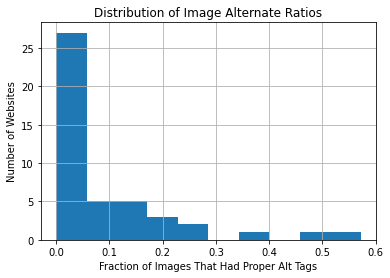

In [72]:
imagesdf.ratio.hist()
plt.xlabel('Fraction of Images That Had Proper Alt Tags')
plt.ylabel('Number of Websites')
plt.title('Distribution of Image Alternate Ratios')

In [73]:
htmldf = pd.read_csv('Documents/mdst_charts/output_sorted.csv')

In [74]:
htmldf["score"] = htmldf["score"]/60

In [75]:
htmldf.head()

,Unnamed: 0,website,low,medium,high,score
0,0,lsamusic,11,0,0,0.000000
1,1,ppe,36,5,6,0.466667
2,2,rll,36,5,6,0.466667
3,3,neurosci,37,5,6,0.466667
4,4,soc,40,5,6,0.466667


Text(0.5, 1.0, 'Distribution of Html Scores')

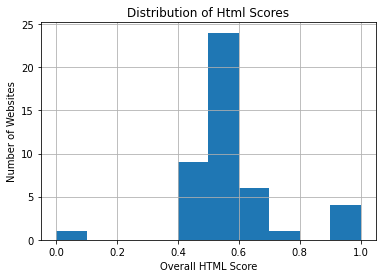

In [76]:
htmldf.score.hist()
plt.xlabel('Overall HTML Score')
plt.ylabel('Number of Websites')
plt.title('Distribution of Html Scores')

In [77]:
ccdf = pd.read_csv('Documents/mdst_charts/cc_data_some_websites.csv')

In [78]:
ccdf.head()

,Type,Website,Decimal Color Contrast
0,history,https://lsa.umich.edu/history,0.626
1,math,https://lsa.umich.edu/math,0.534
2,english,https://lsa.umich.edu/english,0.532
3,physics,https://lsa.umich.edu/physics,0.510
4,Philosophy,https://lsa.umich.edu/philosophy,0.514


In [79]:
#renames some of the columns 
ccdf.rename({
    'Decimal Color Contrast':'cc_score',
    'Type':'website',
    },
    axis=1,inplace=True)

In [80]:
ccdf.head()

,website,Website,cc_score
0,history,https://lsa.umich.edu/history,0.626
1,math,https://lsa.umich.edu/math,0.534
2,english,https://lsa.umich.edu/english,0.532
3,physics,https://lsa.umich.edu/physics,0.510
4,Philosophy,https://lsa.umich.edu/philosophy,0.514


Text(0.5, 1.0, 'Distribution of Color Contrast Scores')

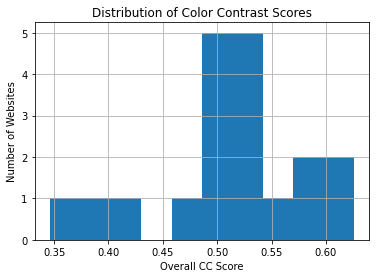

In [81]:
ccdf.cc_score.hist()
plt.xlabel('Overall CC Score')
plt.ylabel('Number of Websites')
plt.title('Distribution of Color Contrast Scores')

In [82]:
merge_html_image = htmldf.merge(imagesdf, how = 'inner', on = ['website'])

In [83]:
merge_html_image.head()

,Unnamed: 0,website,low,medium,high,score,Number,present,total,ratio
0,0,lsamusic,11,0,0,0.000000,19,0,0,0.00
1,1,ppe,36,5,6,0.466667,29,5,5,0.00
2,2,rll,36,5,6,0.466667,30,5,5,0.00
3,3,neurosci,37,5,6,0.466667,3,3,4,0.25
4,4,soc,40,5,6,0.466667,31,5,5,0.00


In [84]:
#renames some of the columns 
merge_html_image.rename({
    'score':'HTML_score',
    'ratio': 'Image_score',
    },
    axis=1,inplace=True)

<AxesSubplot:xlabel='Image_score', ylabel='HTML_score'>

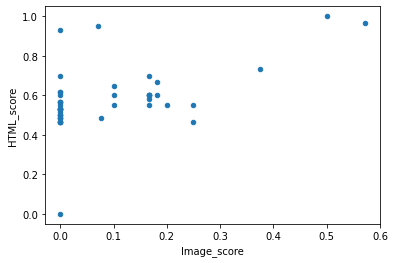

In [85]:
merge_html_image.plot.scatter(x='Image_score',y='HTML_score')

In [86]:
merge_cc_image = merge_html_image.merge(ccdf, how = 'inner', on = ['website'])

In [87]:
merge_cc_image.head()

,Unnamed: 0,website,low,medium,high,HTML_score,Number,present,total,Image_score,Website,cc_score
0,0,lsamusic,11,0,0,0.000000,19,0,0,0.00,https://smtd.umich.edu/departments/musical-the...,0.346
1,4,soc,40,5,6,0.466667,31,5,5,0.00,https://lsa.umich.edu/soc,0.499
2,16,math,40,7,6,0.533333,27,5,5,0.00,https://lsa.umich.edu/math,0.534
3,18,german,42,7,6,0.533333,36,6,6,0.00,https://lsa.umich.edu/german,0.540
4,20,stats,37,6,7,0.550000,4,3,4,0.25,https://lsa.umich.edu/stats,0.511


<AxesSubplot:xlabel='Image_score', ylabel='cc_score'>

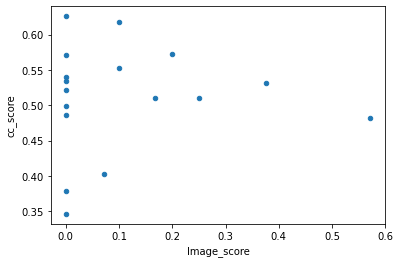

In [88]:
merge_cc_image.plot.scatter(x='Image_score',y='cc_score')

<AxesSubplot:xlabel='cc_score', ylabel='HTML_score'>

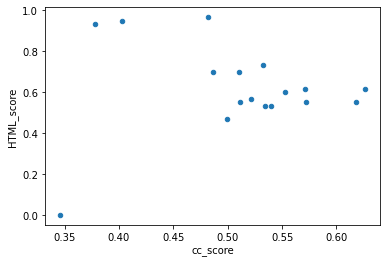

In [89]:
merge_cc_image.plot.scatter(x= 'cc_score', y= 'HTML_score')

In [90]:
merge_cc_image['Combined_accessibility_score'] = merge_cc_image['cc_score'] + merge_cc_image['Image_score']+ (merge_cc_image['HTML_score'])

Text(0.5, 1.0, 'Overall Scores')

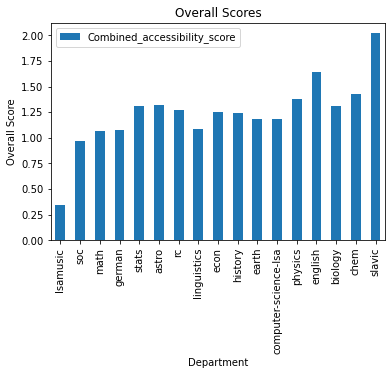

In [93]:
merge_cc_image.plot.bar(x='website',y='Combined_accessibility_score')
plt.xlabel('Department')
plt.ylabel('Overall Score')
plt.title('Overall Scores')

In [92]:
merge_cc_image[["cc_score", "HTML_score","Image_score","Combined_accessibility_score"]].describe()

,cc_score,HTML_score,Image_score,Combined_accessibility_score
count,17.000000,17.000000,17.000000,17.000000
mean,0.510706,0.621569,0.107913,1.240188
std,0.076590,0.222733,0.162897,0.335435
min,0.346000,0.000000,0.000000,0.346000
25%,0.486000,0.550000,0.000000,1.087667
50%,0.521000,0.600000,0.000000,1.253000
75%,0.553000,0.700000,0.166667,1.322000
max,0.626000,0.966667,0.571429,2.020095
